In [1]:
%matplotlib notebook

In [2]:
# !pip install bar_chart_race

In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as polt
import matplotlib.pyplot as plt
import numpy as np
import bar_chart_race as bcr

In [4]:
import warnings
warnings.filterwarnings('ignore')

# What types of delays are seen in airports?

In [5]:
# import and read csv file
airline_csv_file = pd.read_csv('Airline_Delay_Cause.csv')

In [6]:
# see and drop null values
# airline_csv_file.info()

airline_df = airline_csv_file.dropna()
airline_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71657,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,...,0.0,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0
71658,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,...,0.0,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0
71659,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,...,0.0,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0
71660,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,...,0.0,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0


In [7]:
airline_df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

* arr_del15
Number of flights more than 15 minutes late
* carrier_ct
Number of flights delayed due to the air carrier. (e.g. no crew)
* weather_ct
Number of flights due to weather.
* nas_ct
Number of flights delayed due to the National Aviation System (e.g. heavy air traffic).
* security_ct
Number of flights canceled due to a security breach.
* late_aircraft_ct
Number of flights delayed as a result of another flight on the same aircraft delayed


In [8]:
# extract all columns needed 
reduced_airline_df = airline_df.loc[:, ['year','arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]
reduced_airline_df

,year,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,2022,2.0,0.92,1.00,0.08,0.0,0.00
1,2022,25.0,11.80,0.72,5.01,0.0,7.48
2,2022,19.0,5.84,1.00,6.76,0.0,5.40
3,2022,10.0,1.32,1.00,2.40,1.0,4.28
4,2022,30.0,18.10,5.75,3.60,0.0,2.55
...,...,...,...,...,...,...,...
71657,2019,68.0,12.12,1.87,17.97,0.0,36.04
71658,2019,14.0,2.74,0.69,2.46,0.0,8.11
71659,2019,26.0,4.67,2.26,11.81,0.0,7.26
71660,2019,35.0,6.83,6.92,11.50,0.0,9.75


In [9]:
# calculate percentages of each type of delay
reduced_airline_df['carrier_ct_pct'] = (reduced_airline_df['carrier_ct']/reduced_airline_df['arr_del15'])*100

reduced_airline_df['weather_ct_pct'] = (reduced_airline_df['weather_ct']/reduced_airline_df['arr_del15'])*100

reduced_airline_df['nas_ct_pct'] = (reduced_airline_df['nas_ct']/reduced_airline_df['arr_del15'])*100

reduced_airline_df['security_ct_pct'] = (reduced_airline_df['security_ct']/reduced_airline_df['arr_del15'])*100

reduced_airline_df['late_aircraft_ct_pct'] = (reduced_airline_df['late_aircraft_ct']/reduced_airline_df['arr_del15'])*100
reduced_airline_df

,year,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
0,2022,2.0,0.92,1.00,0.08,0.0,0.00,46.000000,50.000000,4.000000,0.0,0.000000
1,2022,25.0,11.80,0.72,5.01,0.0,7.48,47.200000,2.880000,20.040000,0.0,29.920000
2,2022,19.0,5.84,1.00,6.76,0.0,5.40,30.736842,5.263158,35.578947,0.0,28.421053
3,2022,10.0,1.32,1.00,2.40,1.0,4.28,13.200000,10.000000,24.000000,10.0,42.800000
4,2022,30.0,18.10,5.75,3.60,0.0,2.55,60.333333,19.166667,12.000000,0.0,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
71657,2019,68.0,12.12,1.87,17.97,0.0,36.04,17.823529,2.750000,26.426471,0.0,53.000000
71658,2019,14.0,2.74,0.69,2.46,0.0,8.11,19.571429,4.928571,17.571429,0.0,57.928571
71659,2019,26.0,4.67,2.26,11.81,0.0,7.26,17.961538,8.692308,45.423077,0.0,27.923077
71660,2019,35.0,6.83,6.92,11.50,0.0,9.75,19.514286,19.771429,32.857143,0.0,27.857143


In [10]:
# create df with only the percentages columns 
reduced_airline_df2 = reduced_airline_df.loc[:, ['year', 'carrier_ct_pct', 'weather_ct_pct', 'nas_ct_pct', 'security_ct_pct', 'late_aircraft_ct_pct']]
reduced_airline_df2

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
0,2022,46.000000,50.000000,4.000000,0.0,0.000000
1,2022,47.200000,2.880000,20.040000,0.0,29.920000
2,2022,30.736842,5.263158,35.578947,0.0,28.421053
3,2022,13.200000,10.000000,24.000000,10.0,42.800000
4,2022,60.333333,19.166667,12.000000,0.0,8.500000
...,...,...,...,...,...,...
71657,2019,17.823529,2.750000,26.426471,0.0,53.000000
71658,2019,19.571429,4.928571,17.571429,0.0,57.928571
71659,2019,17.961538,8.692308,45.423077,0.0,27.923077
71660,2019,19.514286,19.771429,32.857143,0.0,27.857143


# 2019 data

In [11]:
yrone_airline_df = reduced_airline_df2.loc[reduced_airline_df2['year'] == 2019]
yrone_airline_df

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
50716,2019,50.000000,0.000000,0.000000,0.0,50.000000
50717,2019,25.750000,0.000000,24.375000,0.0,49.875000
50718,2019,34.769231,0.307692,45.846154,0.0,19.076923
50719,2019,26.853659,1.804878,34.121951,0.0,37.195122
50720,2019,47.117647,0.000000,27.411765,0.0,25.470588
...,...,...,...,...,...,...
71657,2019,17.823529,2.750000,26.426471,0.0,53.000000
71658,2019,19.571429,4.928571,17.571429,0.0,57.928571
71659,2019,17.961538,8.692308,45.423077,0.0,27.923077
71660,2019,19.514286,19.771429,32.857143,0.0,27.857143


In [12]:
# rename columns
renamed_yrone_airline_df = yrone_airline_df.rename(columns={'carrier_ct_pct': 'Air Carrier', 'weather_ct_pct': 'Extreme Weather', 'nas_ct_pct': 'National Aviation System', 'security_ct_pct': 'Security', 'late_aircraft_ct_pct': 'Late-arriving Aircraft'})
renamed_yrone_airline_df

,year,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
50716,2019,50.000000,0.000000,0.000000,0.0,50.000000
50717,2019,25.750000,0.000000,24.375000,0.0,49.875000
50718,2019,34.769231,0.307692,45.846154,0.0,19.076923
50719,2019,26.853659,1.804878,34.121951,0.0,37.195122
50720,2019,47.117647,0.000000,27.411765,0.0,25.470588
...,...,...,...,...,...,...
71657,2019,17.823529,2.750000,26.426471,0.0,53.000000
71658,2019,19.571429,4.928571,17.571429,0.0,57.928571
71659,2019,17.961538,8.692308,45.423077,0.0,27.923077
71660,2019,19.514286,19.771429,32.857143,0.0,27.857143


In [13]:
renamed_yrone_airline_df = renamed_yrone_airline_df.set_index('year')

In [14]:
bcr.bar_chart_race(renamed_yrone_airline_df[:50], title = '2019 Airport Delay Types by Percentage', fixed_order=True, label_bars=True, fixed_max=True, filename="video_2019.mp4", figsize=(5, 3), steps_per_period=45, period_length=1500, period_fmt='{x:.0f}')





In [15]:
renamed_yrone_airline_df.describe()

,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
count,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000
mean,33.819853,4.309595,27.121323,0.193093,34.557764
std,18.401086,7.594258,18.054168,1.569779,17.693909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.157484,0.000000,14.875000,0.000000,24.000000
50%,31.964901,1.678571,24.810167,0.000000,34.933259
75%,42.857143,5.647059,36.596850,0.000000,45.095823
max,100.000000,100.000000,100.000000,100.000000,100.000000


<IPython.core.display.Javascript object>


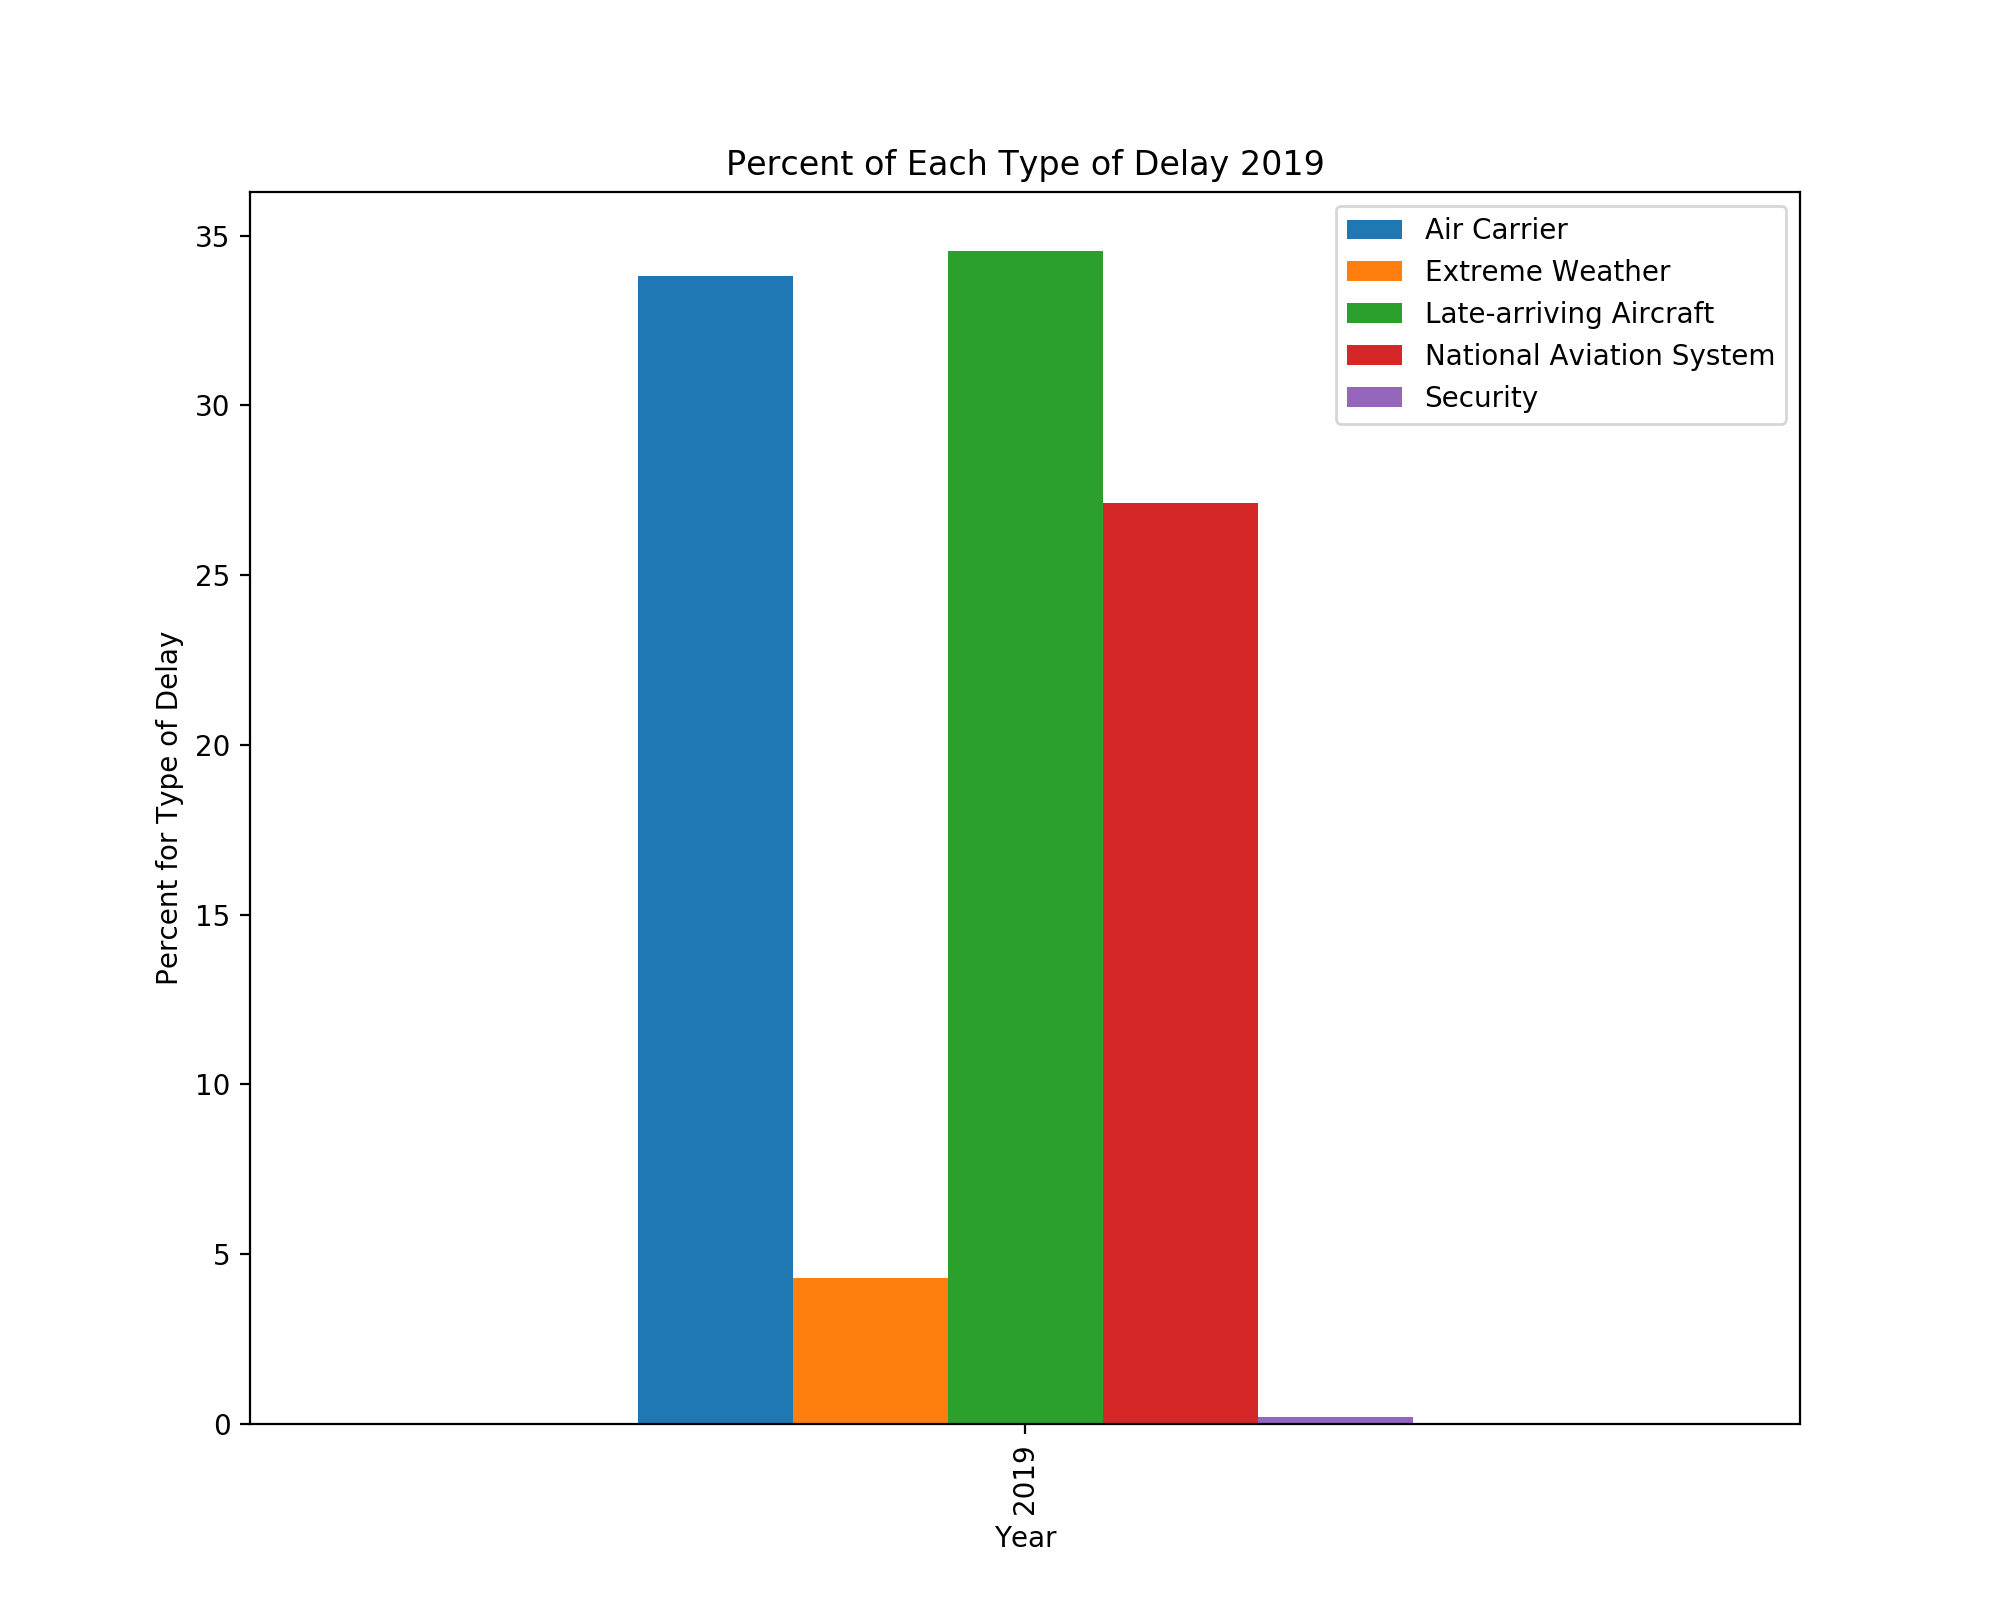

Text(0, 0.5, 'Percent for Type of Delay')

In [16]:
# Generate a bar plot showing the percent of each type of delay for that year
reduced_airline_one_df_pivot = pd.pivot_table(renamed_yrone_airline_df,
                                           index="year")
ax = reduced_airline_one_df_pivot.plot(title = "Percent of Each Type of Delay 2019", kind = "bar")
fig = ax.get_figure()
fig.set_size_inches(10, 8)
ax.set_xlabel("Year")
ax.set_ylabel("Percent for Type of Delay")

# 2020 data

In [17]:
yrtwo_airline_df = reduced_airline_df2.loc[reduced_airline_df2['year'] == 2020]
yrtwo_airline_df

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
31857,2020,54.333333,0.0,4.000000,0.0,41.666667
31858,2020,96.000000,0.0,4.000000,0.0,0.000000
31859,2020,71.875000,0.0,20.000000,0.0,8.125000
31860,2020,46.333333,0.0,20.333333,0.0,33.333333
31861,2020,43.454545,0.0,47.454545,0.0,9.090909
...,...,...,...,...,...,...
50711,2020,NaN,NaN,NaN,NaN,NaN
50712,2020,NaN,NaN,NaN,NaN,NaN
50713,2020,17.900000,10.0,40.100000,0.0,32.000000
50714,2020,0.000000,0.0,100.000000,0.0,0.000000


In [18]:
yrtwo_airline_df = yrtwo_airline_df.dropna()
yrtwo_airline_df

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
31857,2020,54.333333,0.0,4.000000,0.0,41.666667
31858,2020,96.000000,0.0,4.000000,0.0,0.000000
31859,2020,71.875000,0.0,20.000000,0.0,8.125000
31860,2020,46.333333,0.0,20.333333,0.0,33.333333
31861,2020,43.454545,0.0,47.454545,0.0,9.090909
...,...,...,...,...,...,...
50709,2020,26.000000,0.0,40.666667,0.0,33.333333
50710,2020,33.250000,0.0,41.750000,0.0,25.000000
50713,2020,17.900000,10.0,40.100000,0.0,32.000000
50714,2020,0.000000,0.0,100.000000,0.0,0.000000


In [19]:
# rename columns
renamed_yrtwo_airline_df = yrtwo_airline_df.rename(columns={'carrier_ct_pct': 'Air Carrier', 'weather_ct_pct': 'Extreme Weather', 'nas_ct_pct': 'National Aviation System', 'security_ct_pct': 'Security', 'late_aircraft_ct_pct': 'Late-arriving Aircraft'})
renamed_yrtwo_airline_df

,year,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
31857,2020,54.333333,0.0,4.000000,0.0,41.666667
31858,2020,96.000000,0.0,4.000000,0.0,0.000000
31859,2020,71.875000,0.0,20.000000,0.0,8.125000
31860,2020,46.333333,0.0,20.333333,0.0,33.333333
31861,2020,43.454545,0.0,47.454545,0.0,9.090909
...,...,...,...,...,...,...
50709,2020,26.000000,0.0,40.666667,0.0,33.333333
50710,2020,33.250000,0.0,41.750000,0.0,25.000000
50713,2020,17.900000,10.0,40.100000,0.0,32.000000
50714,2020,0.000000,0.0,100.000000,0.0,0.000000


In [20]:
renamed_yrtwo_airline_df = renamed_yrtwo_airline_df.set_index('year')

In [21]:
bcr.bar_chart_race(renamed_yrtwo_airline_df[:50], title = '2020 Airport Delay Types by Percentage', fixed_order=True, label_bars=True, fixed_max=True, filename="video_2020.mp4", figsize=(5, 3), steps_per_period=45, period_length=1500, period_fmt='{x:.0f}')





In [22]:
renamed_yrtwo_airline_df.describe()

,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
count,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000
mean,44.392157,5.859569,28.948766,0.356634,20.445534
std,27.719822,12.527440,24.791643,2.961415,21.000973
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,6.750000,0.000000,0.000000
50%,41.267081,0.000000,26.133333,0.000000,16.666667
75%,60.692308,6.600000,43.500000,0.000000,33.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


<IPython.core.display.Javascript object>


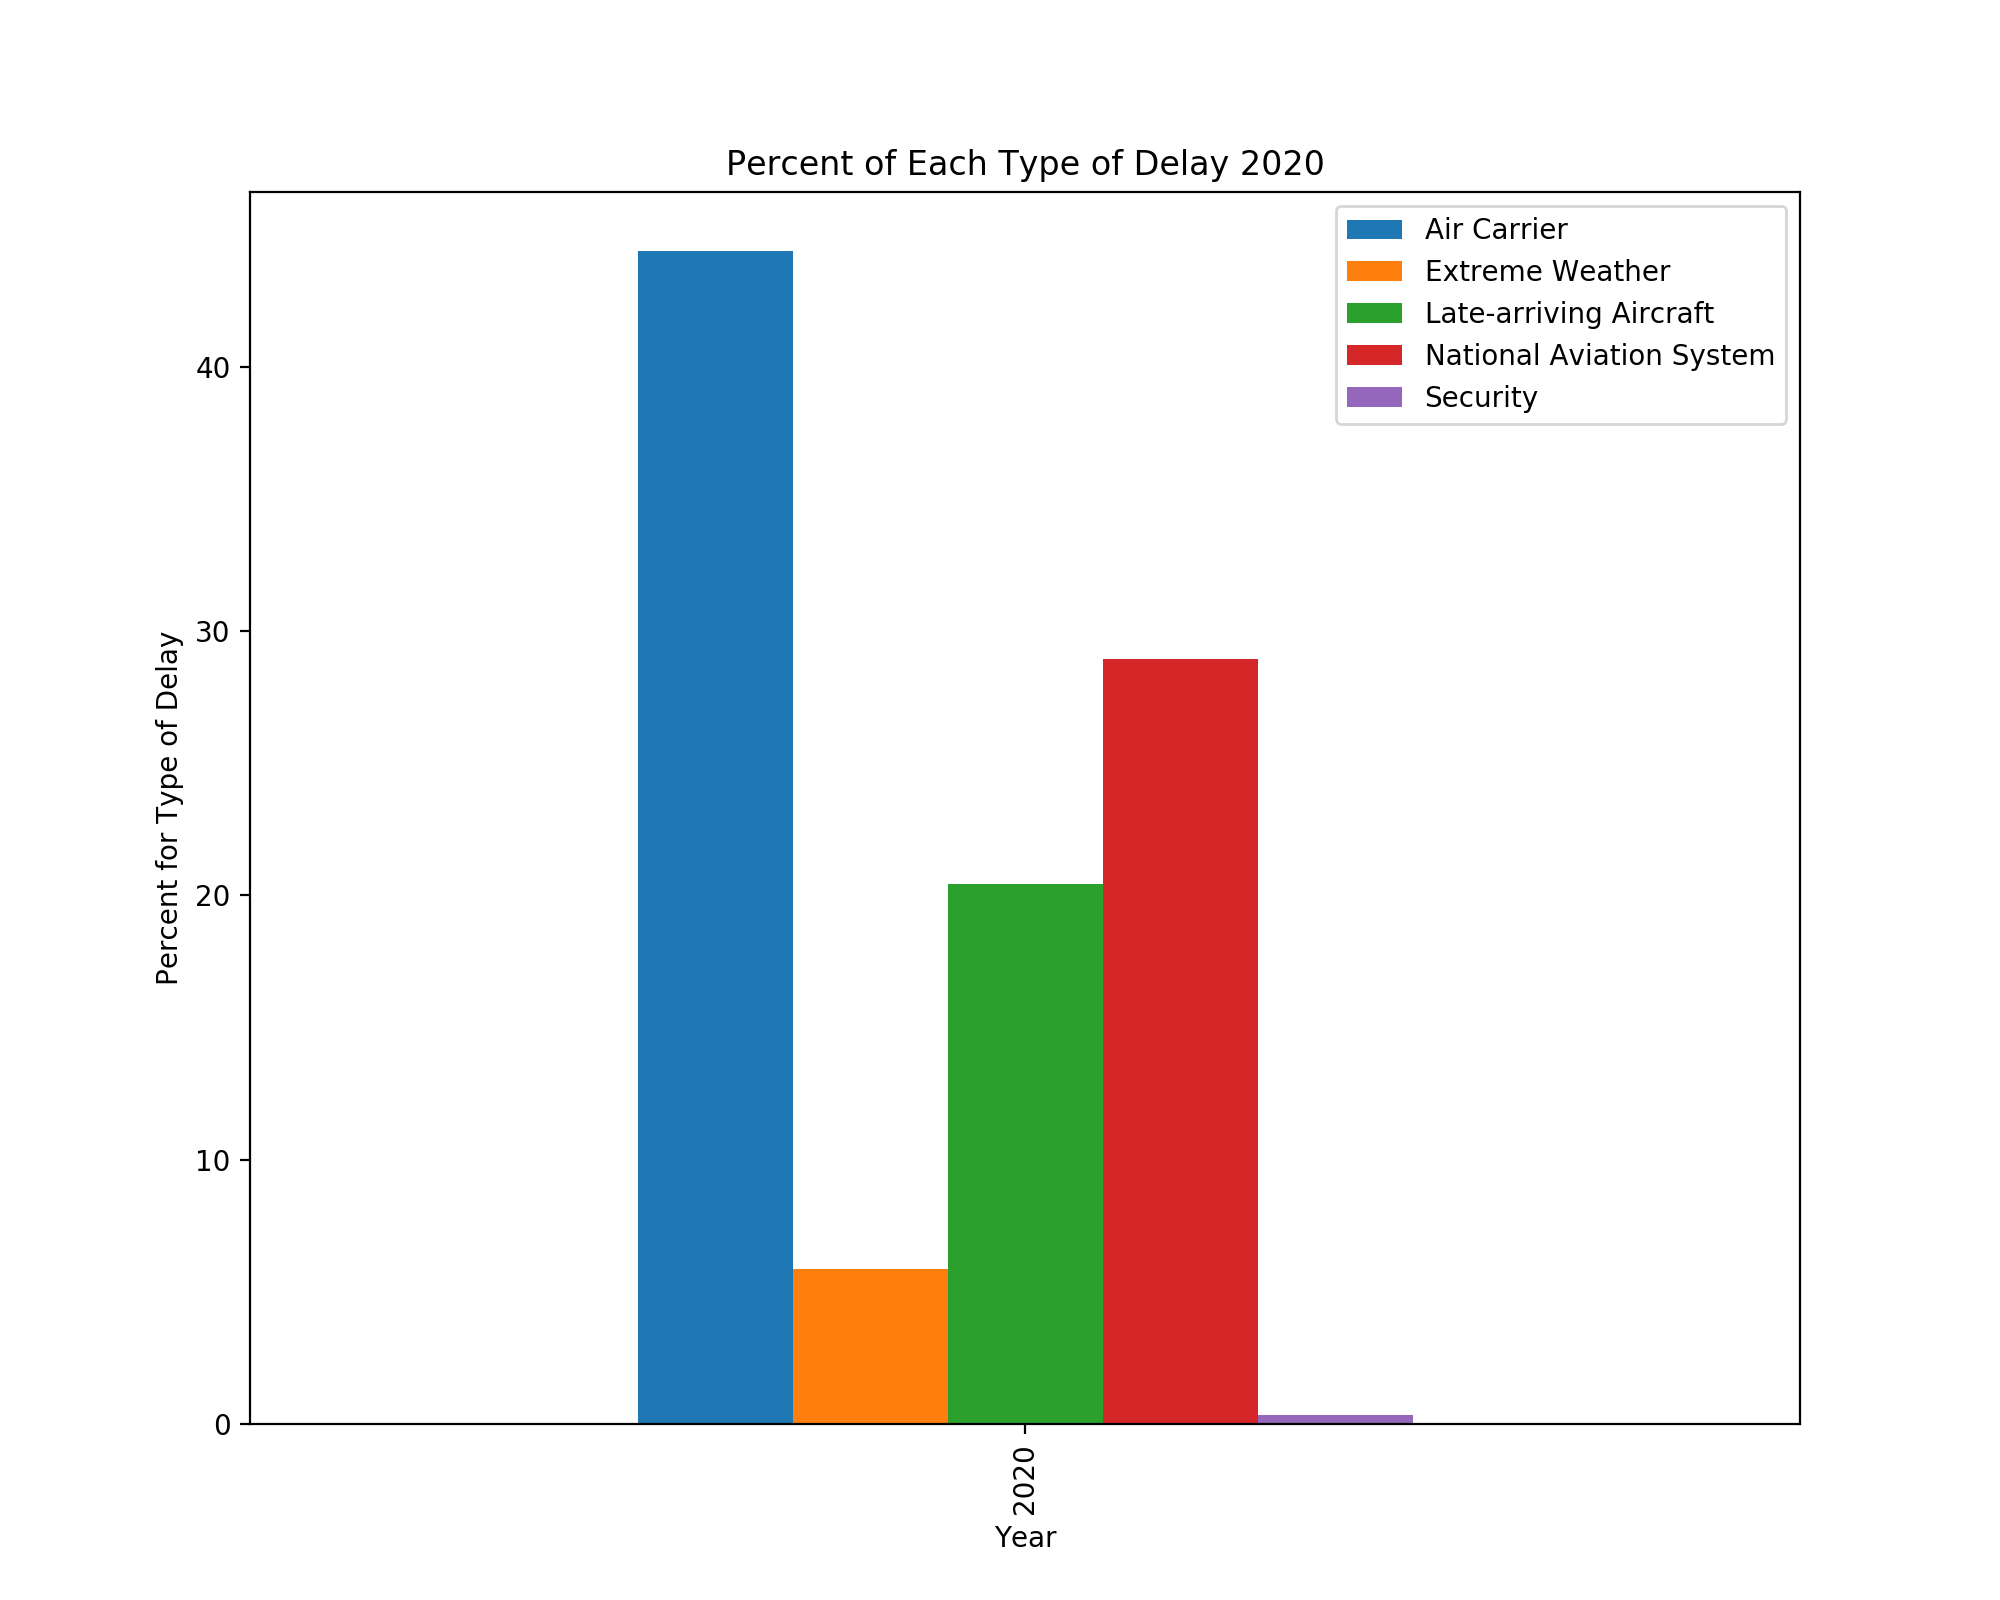

Text(0, 0.5, 'Percent for Type of Delay')

In [23]:
# Generate a bar plot showing the percent of each type of delay for that year
reduced_airline_two_df_pivot = pd.pivot_table(renamed_yrtwo_airline_df,
                                           index="year")
ax = reduced_airline_two_df_pivot.plot(title = "Percent of Each Type of Delay 2020", kind = "bar")
fig = ax.get_figure()
fig.set_size_inches(10, 8)
ax.set_xlabel("Year")
ax.set_ylabel("Percent for Type of Delay")

# 2021 data

In [24]:
yrthree_airline_df = reduced_airline_df2.loc[reduced_airline_df2['year'] == 2021]
yrthree_airline_df

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
11903,2021,27.888889,0.000000,39.333333,0.0,32.777778
11904,2021,45.636364,0.000000,37.363636,0.0,17.000000
11905,2021,32.875000,0.000000,52.750000,0.0,14.375000
11906,2021,47.388889,18.055556,19.388889,0.0,15.222222
11907,2021,52.500000,31.333333,2.500000,0.0,13.666667
...,...,...,...,...,...,...
31852,2021,54.250000,0.000000,29.375000,0.0,16.375000
31853,2021,33.947368,0.105263,38.368421,0.0,27.578947
31854,2021,0.000000,0.000000,100.000000,0.0,0.000000
31855,2021,NaN,NaN,NaN,NaN,NaN


In [25]:
yrthree_airline_df = yrthree_airline_df.dropna()
yrthree_airline_df

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
11903,2021,27.888889,0.000000,39.333333,0.0,32.777778
11904,2021,45.636364,0.000000,37.363636,0.0,17.000000
11905,2021,32.875000,0.000000,52.750000,0.0,14.375000
11906,2021,47.388889,18.055556,19.388889,0.0,15.222222
11907,2021,52.500000,31.333333,2.500000,0.0,13.666667
...,...,...,...,...,...,...
31849,2021,37.125000,0.000000,50.375000,0.0,12.500000
31850,2021,55.333333,0.000000,11.333333,0.0,33.333333
31852,2021,54.250000,0.000000,29.375000,0.0,16.375000
31853,2021,33.947368,0.105263,38.368421,0.0,27.578947


In [26]:
# rename columns
renamed_yrthree_airline_df = yrthree_airline_df.rename(columns={'carrier_ct_pct': 'Air Carrier', 'weather_ct_pct': 'Extreme Weather', 'nas_ct_pct': 'National Aviation System', 'security_ct_pct': 'Security', 'late_aircraft_ct_pct': 'Late-arriving Aircraft'})
renamed_yrthree_airline_df

,year,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
11903,2021,27.888889,0.000000,39.333333,0.0,32.777778
11904,2021,45.636364,0.000000,37.363636,0.0,17.000000
11905,2021,32.875000,0.000000,52.750000,0.0,14.375000
11906,2021,47.388889,18.055556,19.388889,0.0,15.222222
11907,2021,52.500000,31.333333,2.500000,0.0,13.666667
...,...,...,...,...,...,...
31849,2021,37.125000,0.000000,50.375000,0.0,12.500000
31850,2021,55.333333,0.000000,11.333333,0.0,33.333333
31852,2021,54.250000,0.000000,29.375000,0.0,16.375000
31853,2021,33.947368,0.105263,38.368421,0.0,27.578947


In [27]:
renamed_yrthree_airline_df = renamed_yrthree_airline_df.set_index('year')

In [28]:
bcr.bar_chart_race(renamed_yrthree_airline_df[:50], title = '2021 Airport Delay Types by Percentage', fixed_order=True, label_bars=True, fixed_max=True, filename="video_2021.mp4", figsize=(5, 3), steps_per_period=45, period_length=1500, period_fmt='{x:.0f}')





In [29]:
renamed_yrthree_airline_df.describe()

,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
count,19044.000000,19044.000000,19044.000000,19044.000000,19044.000000
mean,43.406770,5.468362,24.693702,0.439741,25.993062
std,23.373688,9.928497,21.108630,2.423896,19.479692
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.906308,0.000000,6.943296,0.000000,11.587413
50%,40.909091,1.297999,22.094235,0.000000,25.000000
75%,56.104984,7.142857,36.886995,0.000000,37.800704
max,100.000000,100.000000,100.000000,100.000000,100.000000


<IPython.core.display.Javascript object>


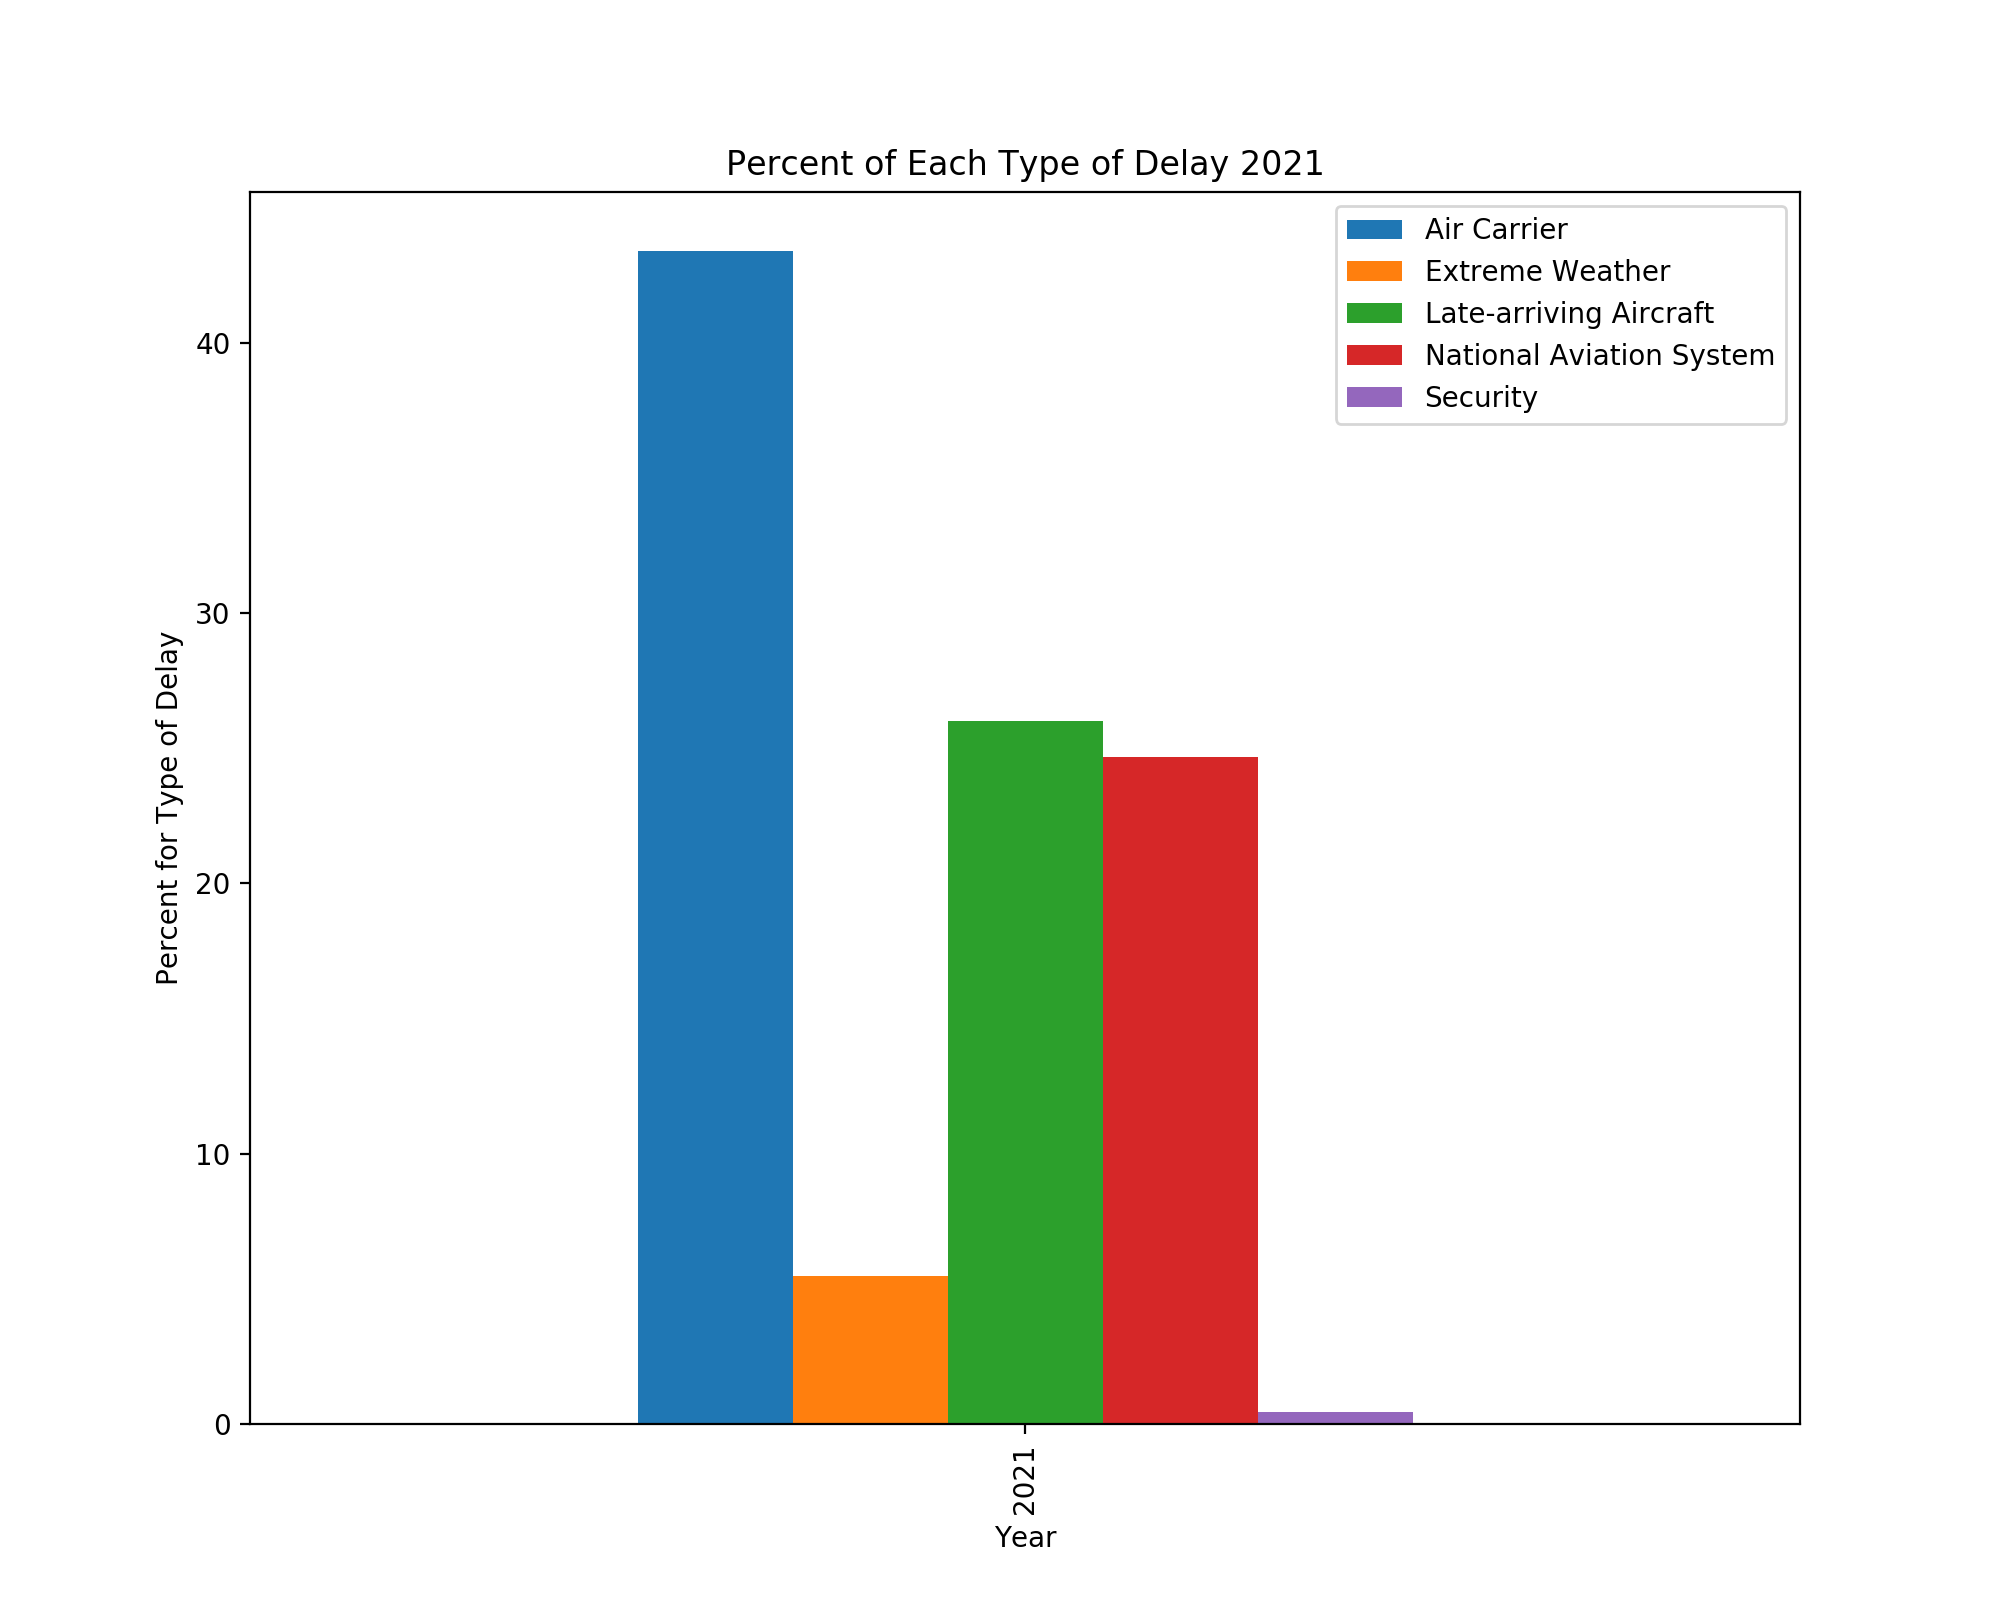

Text(0, 0.5, 'Percent for Type of Delay')

In [30]:
# Generate a bar plot showing the percent of each type of delay for that year
reduced_airline_three_df_pivot = pd.pivot_table(renamed_yrthree_airline_df,
                                           index="year")
ax = reduced_airline_three_df_pivot.plot(title = "Percent of Each Type of Delay 2021", kind = "bar")
fig = ax.get_figure()
fig.set_size_inches(10, 8)
ax.set_xlabel("Year")
ax.set_ylabel("Percent for Type of Delay")

# 2022 data

In [31]:
yrfour_airline_df = reduced_airline_df2.loc[reduced_airline_df2['year'] == 2022]
yrfour_airline_df

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
0,2022,46.000000,50.000000,4.000000,0.000000,0.000000
1,2022,47.200000,2.880000,20.040000,0.000000,29.920000
2,2022,30.736842,5.263158,35.578947,0.000000,28.421053
3,2022,13.200000,10.000000,24.000000,10.000000,42.800000
4,2022,60.333333,19.166667,12.000000,0.000000,8.500000
...,...,...,...,...,...,...
11898,2022,30.666667,39.000000,30.333333,0.000000,0.000000
11899,2022,30.321429,3.821429,19.000000,0.464286,46.357143
11900,2022,56.000000,1.666667,10.666667,0.000000,31.666667
11901,2022,7.000000,0.000000,0.000000,0.000000,93.000000


In [32]:
yrfour_airline_df = yrfour_airline_df.dropna()
yrfour_airline_df

,year,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
0,2022,46.000000,50.000000,4.000000,0.000000,0.000000
1,2022,47.200000,2.880000,20.040000,0.000000,29.920000
2,2022,30.736842,5.263158,35.578947,0.000000,28.421053
3,2022,13.200000,10.000000,24.000000,10.000000,42.800000
4,2022,60.333333,19.166667,12.000000,0.000000,8.500000
...,...,...,...,...,...,...
11898,2022,30.666667,39.000000,30.333333,0.000000,0.000000
11899,2022,30.321429,3.821429,19.000000,0.464286,46.357143
11900,2022,56.000000,1.666667,10.666667,0.000000,31.666667
11901,2022,7.000000,0.000000,0.000000,0.000000,93.000000


In [33]:
# rename columns
renamed_yrfour_airline_df = yrfour_airline_df.rename(columns={'carrier_ct_pct': 'Air Carrier', 'weather_ct_pct': 'Extreme Weather', 'nas_ct_pct': 'National Aviation System', 'security_ct_pct': 'Security', 'late_aircraft_ct_pct': 'Late-arriving Aircraft'})
renamed_yrfour_airline_df

,year,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
0,2022,46.000000,50.000000,4.000000,0.000000,0.000000
1,2022,47.200000,2.880000,20.040000,0.000000,29.920000
2,2022,30.736842,5.263158,35.578947,0.000000,28.421053
3,2022,13.200000,10.000000,24.000000,10.000000,42.800000
4,2022,60.333333,19.166667,12.000000,0.000000,8.500000
...,...,...,...,...,...,...
11898,2022,30.666667,39.000000,30.333333,0.000000,0.000000
11899,2022,30.321429,3.821429,19.000000,0.464286,46.357143
11900,2022,56.000000,1.666667,10.666667,0.000000,31.666667
11901,2022,7.000000,0.000000,0.000000,0.000000,93.000000


In [34]:
renamed_yrfour_airline_df = renamed_yrfour_airline_df.set_index('year')

In [35]:
bcr.bar_chart_race(renamed_yrfour_airline_df[:50], title = '2022 Airport Delay Types by Percentage', fixed_order=True, label_bars=True, fixed_max=True, filename="video_2022.mp4", figsize=(5, 3), steps_per_period=45, period_length=1500, period_fmt='{x:.0f}')





In [36]:
renamed_yrfour_airline_df.describe()

,Air Carrier,Extreme Weather,National Aviation System,Security,Late-arriving Aircraft
count,11573.000000,11573.000000,11573.000000,11573.000000,11573.000000
mean,43.885458,4.707644,21.997294,0.271707,29.139292
std,21.483383,8.648606,18.165845,1.433429,18.061756
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.388889,0.000000,7.193548,0.000000,16.840000
50%,40.954545,1.572816,20.259259,0.000000,28.884615
75%,56.500000,5.812500,32.583333,0.000000,40.569444
max,100.000000,100.000000,100.000000,66.000000,100.000000


In [37]:
top_security = reduced_airline_df.nlargest(10, ['security_ct_pct'])
top_security

,year,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
31450,2021,1.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,100.0,0.0
35549,2020,1.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,100.0,0.0
35722,2020,1.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,100.0,0.0
41040,2020,1.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,100.0,0.0
44075,2020,1.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,100.0,0.0
44673,2020,1.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,100.0,0.0
51040,2019,1.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,100.0,0.0
37208,2020,1.0,0.0,0.0,0.06,0.94,0.0,0.0,0.0,6.0,94.0,0.0
27813,2021,1.0,0.0,0.0,0.07,0.93,0.0,0.0,0.0,7.0,93.0,0.0
33981,2020,1.0,0.0,0.0,0.08,0.93,0.0,0.0,0.0,8.0,93.0,0.0


In [38]:
top_weather = reduced_airline_df.nlargest(10, ['weather_ct_pct'])
top_weather

,year,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
991,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
1124,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
5022,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
5100,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
6182,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
7880,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
8221,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
8423,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
8435,2022,3.0,0.0,3.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
8566,2022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


In [39]:
reduced_airline_df.describe()

,year,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct_pct,weather_ct_pct,nas_ct_pct,security_ct_pct,late_aircraft_ct_pct
count,71346.000000,71346.000000,71346.000000,71346.000000,71346.000000,71346.000000,71346.000000,67322.000000,67322.000000,67322.000000,67322.000000,67322.000000
mean,2020.319345,51.217545,17.555594,1.956087,14.375566,0.160544,17.169802,40.843403,5.084247,25.999931,0.316308,27.757953
std,1.066465,149.668639,46.920958,6.872883,50.550951,0.787044,57.051074,23.340588,9.839318,20.897057,2.215339,19.837505
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,5.000000,1.670000,0.000000,0.560000,0.000000,0.800000,25.200000,0.000000,10.000000,0.000000,12.916952
50%,2020.000000,13.000000,4.940000,0.160000,2.750000,0.000000,3.170000,37.656158,1.086957,23.615385,0.000000,27.500000
75%,2021.000000,35.000000,13.550000,1.570000,8.370000,0.000000,10.580000,52.500000,6.250000,37.500000,0.000000,40.300000
max,2022.000000,3714.000000,1147.000000,226.000000,1485.820000,58.690000,1531.810000,100.000000,100.000000,100.000000,100.000000,100.000000


<IPython.core.display.Javascript object>


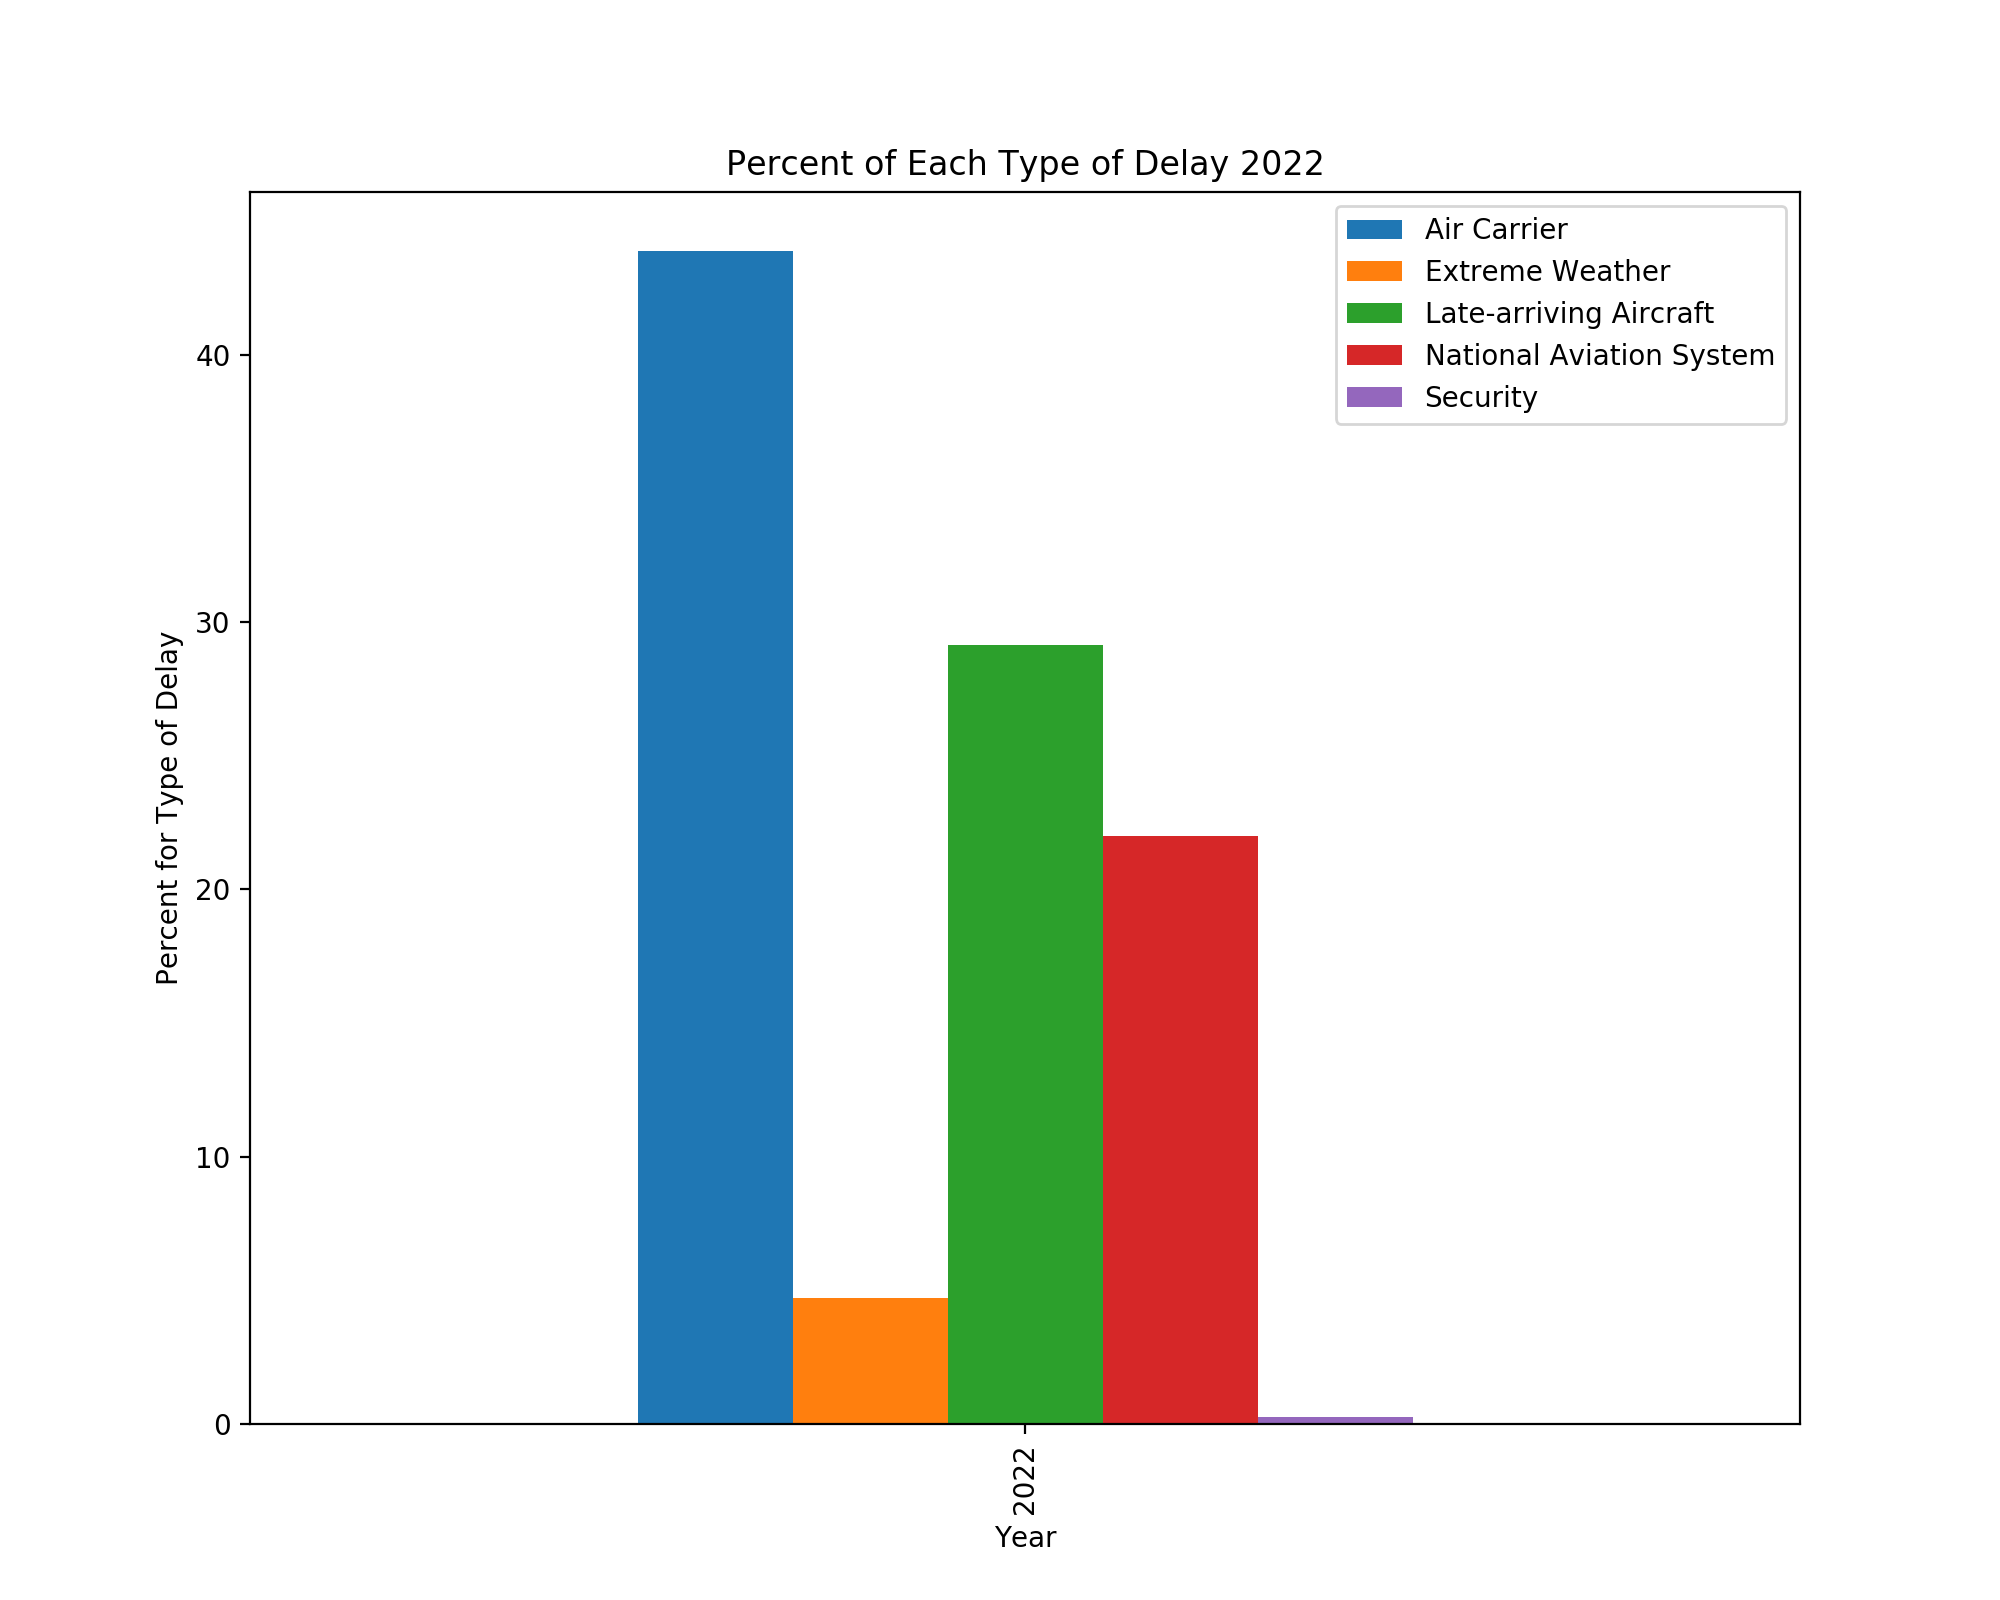

Text(0, 0.5, 'Percent for Type of Delay')

In [40]:
# Generate a bar plot showing the percent of each type of delay for that year
reduced_airline_four_df_pivot = pd.pivot_table(renamed_yrfour_airline_df,
                                           index="year")
ax = reduced_airline_four_df_pivot.plot(title = "Percent of Each Type of Delay 2022", kind = "bar")
fig = ax.get_figure()
fig.set_size_inches(10, 8)
ax.set_xlabel("Year")
ax.set_ylabel("Percent for Type of Delay")